# Using NetworkX to Graph Prison Inmate Data

In [1]:
#to make notebook wider
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#to hide warnings
import warnings
warnings.filterwarnings('ignore')

import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### DATA SOURCE

AUTHORS: GAGNON & MACRAE PRISON

DATASET: PRISON

DESCRIPTION 
>One 67×67 matrix, non-symmetric, binary.

BACKGROUND 
> In the 1950s John Gagnon collected sociometric choice data from 67 prison inmates. All were asked, "What fellows on the tier are you closest friends with?" Each was free to choose as few or as many "friends" as he desired. The data were analyzed by MacRae and characterized by him as "less clear cut" in their internal structure than similar data from schools or residential populations.

REFERENCE
>MacRae J. (1960). Direct factor analysis of sociometric data. Sociometry, 23, 360-371.

http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/UciData.htm#prison

In [2]:
l = pd.read_csv('https://raw.githubusercontent.com/ilyakats/CUNY-DATA620/master/Private/ChristopheHunt/Assignment%201/Prisoner%20Dataset.csv', header = None)
matrix = np.matrix(l)
g = nx.from_numpy_matrix(matrix, parallel_edges = True, create_using = None)

In [3]:
def rename(x):
    return "Prisoner " + str(x+1)
g = nx.relabel_nodes(g,rename)

In [4]:
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 10)

Populating the interactive namespace from numpy and matplotlib


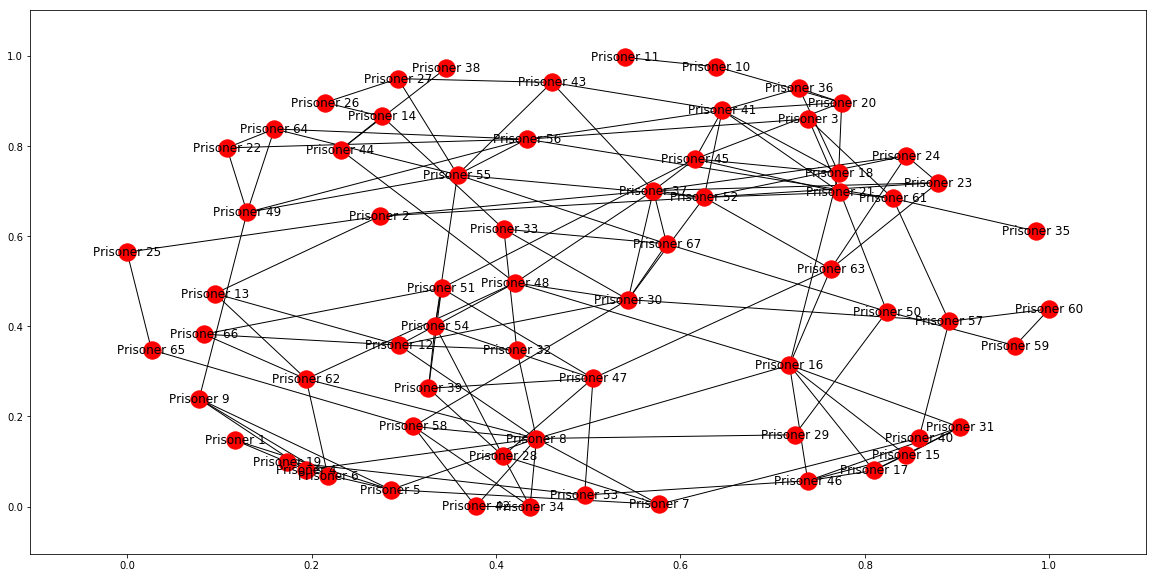

In [5]:
plot = nx.draw_networkx(g)
plt.show()

In [6]:
g.edges("Prisoner 1")

[('Prisoner 1', 'Prisoner 4'), ('Prisoner 1', 'Prisoner 5')]

In [7]:
g.edges("Prisoner 4")

[('Prisoner 4', 'Prisoner 9'),
 ('Prisoner 4', 'Prisoner 8'),
 ('Prisoner 4', 'Prisoner 1'),
 ('Prisoner 4', 'Prisoner 5')]

In [8]:
pr = nx.pagerank_numpy(g, alpha=0.9)

In [9]:
df = list(pr.viewitems())
df = pd.DataFrame(df).sort_values(1, ascending = 0)

In [10]:
df.head()

,0,1
20,Prisoner 8,0.036721
9,Prisoner 37,0.028275
1,Prisoner 52,0.027952
6,Prisoner 30,0.026163
5,Prisoner 55,0.025802
